In [1]:
import pandas as pd

# Aggregate Counts over Intersections

## Load dataset

In [2]:
full_aggregated_data = pd.read_csv("data/counts_per_intersections.csv")
full_aggregated_data

,PanoramaId,n_cameras_median,attached_street_median,attached_building_median,attached_unknown_median,type_dome_median,type_bullet_median,type_unknown_median,n_cameras_agreement,attached_street_agreement,...,attached_unknown_agreement,type_dome_agreement,type_bullet_agreement,type_unknown_agreement,Lat,Long,geometry_pano,BoroName,URL,ImageDate
0,--48RnFczF55WcDFpy5y_Q,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.870564,-73.869327,POINT (-73.86932652339482 40.87056425110688),Bronx,https://www.google.com/maps/@?api=1&map_action...,2019-08
1,--T2iuvfxXJrzbgD7R3W-g,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,2 vs 1,Unanimous,Unanimous,Unanimous,40.669099,-73.762447,POINT (-73.76244689609075 40.6690985670363),Queens,https://www.google.com/maps/@?api=1&map_action...,2020-10
2,--VGAsqPgTXxgZFXuhuhbg,0,0,0,0,0,0,0,Unanimous,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.766790,-73.771211,POINT (-73.7712107859631 40.76679030231237),Queens,https://www.google.com/maps/@?api=1&map_action...,2020-11
3,--YJY0GGvay_3W_O5ObeNQ,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.554253,-74.201603,POINT (-74.20160298846051 40.55425348634071),Staten Island,https://www.google.com/maps/@?api=1&map_action...,2019-09
4,--fUkaf5nn1-bm4KiJ9pVA,1,0,1,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.611084,-74.162803,POINT (-74.16280280196275 40.61108412672856),Staten Island,https://www.google.com/maps/@?api=1&map_action...,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43401,zzj23G_f-_hZa1LrXJ7tig,0,0,0,0,0,0,0,2 vs 1,2 vs 1,...,Unanimous,Unanimous,Unanimous,2 vs 1,40.889133,-73.821303,POINT (-73.82130317259254 40.88913324730224),Bronx,https://www.google.com/maps/@?api=1&map_action...,2019-11
43402,zzpZoM4JHrGNywYitkYT8w,1,0,0,0,0,0,0,2 vs 1,2 vs 1,...,Unanimous,2 vs 1,Unanimous,Unanimous,40.750994,-73.706451,POINT (-73.7064507165946 40.75099428476829),Queens,https://www.google.com/maps/@?api=1&map_action...,2019-07
43403,zztPjLBFQjwEISsA75a-zg,1,1,0,0,1,0,0,All disagree,All disagree,...,Unanimous,All disagree,2 vs 1,Unanimous,40.730852,-73.947876,POINT (-73.9478762022405 40.73085200510598),Brooklyn,https://www.google.com/maps/@?api=1&map_action...,2020-10
43404,zzv84J0v5tQobN5uCXO1xw,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.675203,-73.778650,POINT (-73.77864970575715 40.67520299190087),Queens,https://www.google.com/maps/@?api=1&map_action...,2018-07


## Plot strata frequencies for importance sampling

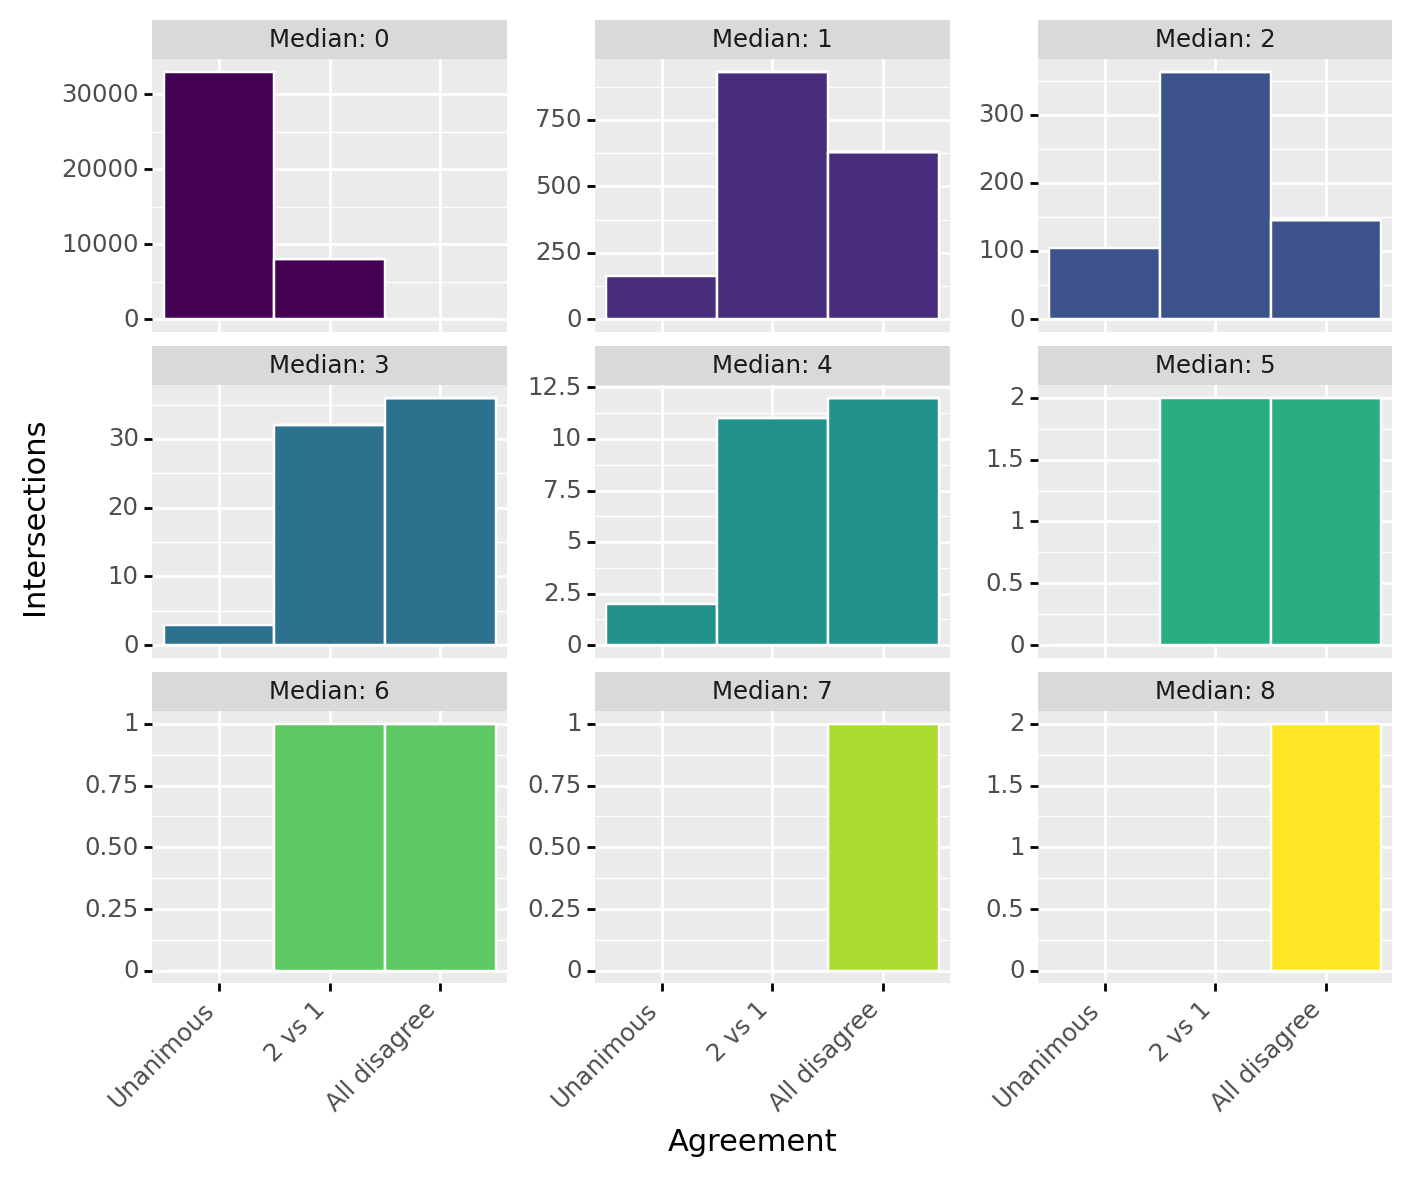

<ggplot: (402564559)>

In [3]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme, ylab, element_text

to_plot = full_aggregated_data[["attached_street_agreement", "attached_street_median"]].copy()
to_plot.columns=["Agreement", "Median"]
agreement_type = pd.CategoricalDtype(
    categories=["Unanimous", "2 vs 1", "All disagree"],
    ordered=True
)
to_plot["Agreement"] = to_plot["Agreement"].astype(agreement_type)


(ggplot(to_plot, aes("Agreement")) 
+ geom_histogram(aes(fill="Median"), color="white", binwidth=1)
+ facet_wrap("Median", scales='free_y', labeller="label_both")
+ ylab("Intersections")
+ theme(
    subplots_adjust={'wspace': 0.25}, 
    axis_text_x=element_text(angle=45, ha="right"),
    figure_size=(8, 6),
    dpi = 200,
    legend_position="none")
) 

## Go from wide to long

In [4]:
median_columns = [x for x in full_aggregated_data.columns if x.endswith("_median")]
median_columns

['n_cameras_median',
 'attached_street_median',
 'attached_building_median',
 'attached_unknown_median',
 'type_dome_median',
 'type_bullet_median',
 'type_unknown_median']

In [5]:
final_long = full_aggregated_data.reset_index().melt(id_vars = ['PanoramaId', 'BoroName'],
                                 value_vars = median_columns,
                                 var_name = "subset",
                                 value_name = "count"
                                )
final_long["subset"] = final_long["subset"].str.replace("_median", "")
final_long

,PanoramaId,BoroName,subset,count
0,--48RnFczF55WcDFpy5y_Q,Bronx,n_cameras,0
1,--T2iuvfxXJrzbgD7R3W-g,Queens,n_cameras,0
2,--VGAsqPgTXxgZFXuhuhbg,Queens,n_cameras,0
3,--YJY0GGvay_3W_O5ObeNQ,Staten Island,n_cameras,0
4,--fUkaf5nn1-bm4KiJ9pVA,Staten Island,n_cameras,1
...,...,...,...,...
303837,zzj23G_f-_hZa1LrXJ7tig,Bronx,type_unknown,0
303838,zzpZoM4JHrGNywYitkYT8w,Queens,type_unknown,0
303839,zztPjLBFQjwEISsA75a-zg,Brooklyn,type_unknown,0
303840,zzv84J0v5tQobN5uCXO1xw,Queens,type_unknown,0


## Summary of camera counts

In [6]:
counts_per_subset = final_long.groupby("subset").sum()
counts_per_subset

,count
subset,
attached_building,22133
attached_street,3317
attached_unknown,86
n_cameras,28954
type_bullet,444
type_dome,2266
type_unknown,63


In [7]:
total_cameras = counts_per_subset.loc[["attached_building", "attached_street", "attached_unknown"]].sum()

In [8]:
counts_per_subset.loc[["attached_building", "attached_street", "attached_unknown", "n_cameras"]] * 100 / total_cameras

,count
subset,
attached_building,86.673716
attached_street,12.989505
attached_unknown,0.336779
n_cameras,113.385025


In [9]:
counts_per_subset.loc[["type_bullet", "type_dome", "type_unknown"]]

,count
subset,
type_bullet,444
type_dome,2266
type_unknown,63


In [10]:
counts_per_subset.loc[["type_bullet", "type_dome", "type_unknown"]] * 100 / total_cameras

,count
subset,
type_bullet,1.738722
type_dome,8.873747
type_unknown,0.246711


## Focus on Borough

In [11]:
by_borough = final_long[final_long["subset"].str.startswith("attached_")].groupby(["BoroName", "subset"]).sum()
by_borough

count
BoroName      subset                  
Bronx         attached_building   3275
              attached_street      456
              attached_unknown       6
Brooklyn      attached_building   8330
              attached_street      871
              attached_unknown      31
Manhattan     attached_building   3213
              attached_street      724
              attached_unknown      11
Queens        attached_building   6459
              attached_street     1088
              attached_unknown      33
Staten Island attached_building    852
              attached_street      178
              attached_unknown       5

In [12]:
by_borough["Percentage"] = by_borough.groupby(level=0).apply(lambda x: 100*x / x.sum())
by_borough

count  Percentage
BoroName      subset                              
Bronx         attached_building   3275   87.637142
              attached_street      456   12.202301
              attached_unknown       6    0.160557
Brooklyn      attached_building   8330   90.229636
              attached_street      871    9.434575
              attached_unknown      31    0.335789
Manhattan     attached_building   3213   81.382979
              attached_street      724   18.338399
              attached_unknown      11    0.278622
Queens        attached_building   6459   85.211082
              attached_street     1088   14.353562
              attached_unknown      33    0.435356
Staten Island attached_building    852   82.318841
              attached_street      178   17.198068
              attached_unknown       5    0.483092

In [13]:
public_per_borough = by_borough.xs("attached_street", level="subset")["count"]
public_per_borough

BoroName
Bronx             456
Brooklyn          871
Manhattan         724
Queens           1088
Staten Island     178
Name: count, dtype: int64

In [14]:
public_per_borough.sum()

3317

In [15]:
total_per_borough = by_borough.groupby(level=0).sum()
total_per_borough

,count,Percentage
BoroName,,
Bronx,3737,100.0
Brooklyn,9232,100.0
Manhattan,3948,100.0
Queens,7580,100.0
Staten Island,1035,100.0


In [16]:
total_per_borough.sum()

count         25532.0
Percentage      500.0
dtype: float64

Number of intersections per borough:

In [17]:
intersections_per_borough = final_long.groupby("BoroName")["PanoramaId"].nunique()
intersections_per_borough

BoroName
Bronx             6257
Brooklyn         10384
Manhattan         3934
Queens           16344
Staten Island     6474
Name: PanoramaId, dtype: int64

In [18]:
cameras_per_intersection = total_per_borough["count"] / intersections_per_borough
cameras_per_intersection

BoroName
Bronx            0.597251
Brooklyn         0.889060
Manhattan        1.003559
Queens           0.463779
Staten Island    0.159870
dtype: float64

In [19]:
cameras_per_intersection.sum()

3.1135188970648806

In [20]:
public_per_intersection = public_per_borough / intersections_per_borough
public_per_intersection

BoroName
Bronx            0.072878
Brooklyn         0.083879
Manhattan        0.184037
Queens           0.066569
Staten Island    0.027495
dtype: float64

In [21]:
public_per_intersection.sum()

0.43485739004243457

## Focus on Intersection

In [22]:
final_long.PanoramaId.nunique()

43406

In [23]:
final_long

,PanoramaId,BoroName,subset,count
0,--48RnFczF55WcDFpy5y_Q,Bronx,n_cameras,0
1,--T2iuvfxXJrzbgD7R3W-g,Queens,n_cameras,0
2,--VGAsqPgTXxgZFXuhuhbg,Queens,n_cameras,0
3,--YJY0GGvay_3W_O5ObeNQ,Staten Island,n_cameras,0
4,--fUkaf5nn1-bm4KiJ9pVA,Staten Island,n_cameras,1
...,...,...,...,...
303837,zzj23G_f-_hZa1LrXJ7tig,Bronx,type_unknown,0
303838,zzpZoM4JHrGNywYitkYT8w,Queens,type_unknown,0
303839,zztPjLBFQjwEISsA75a-zg,Brooklyn,type_unknown,0
303840,zzv84J0v5tQobN5uCXO1xw,Queens,type_unknown,0


In [24]:
sum(final_long[final_long["subset"] == "n_cameras"]["count"] > 0)

14100

In [25]:
sum(final_long[final_long["subset"] == "attached_street"]["count"] > 0)

2442

In [26]:
sum(final_long[final_long["subset"] == "type_dome"]["count"] > 0)

1614